In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
term_freq_df = pd.read_csv('term_freq_df.csv',index_col=0, encoding='utf_8')

In [3]:
csv = 'clean_tweets.csv'
my_df = pd.read_csv(csv, index_col = 0)
my_df.head()

C:\Users\Rushi\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,text,target
0,that bummer you shoulda got david carr of thir...,0
1,is upset that he can not update his facebook b...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it not behaving at all mad why am here beca...,0


In [4]:
my_df[my_df.isnull().any(axis=1)].head()

,text,target
208,NaN,0
249,NaN,0
282,NaN,0
398,NaN,0
430,NaN,0


In [5]:
np.sum(my_df.isnull().any(axis=1))

3936

In [6]:
my_df.isnull().any(axis=0)

text       True
target    False
dtype: bool

In [7]:
my_df.dropna(inplace=True)
my_df.reset_index(drop=True, inplace=True)
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596064 entries, 0 to 1596063
Data columns (total 2 columns):
text      1596064 non-null object
target    1596064 non-null int64
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english',max_features=10000)
cvec.fit(my_df.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=10000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [9]:
document_matrix = cvec.transform(my_df.text)

In [10]:
%%time
neg_batches = np.linspace(0,798179,10).astype(int)
i=0
neg_tf = []
while i < len(neg_batches)-1:
    batch_result = np.sum(document_matrix[neg_batches[i]:neg_batches[i+1]].toarray(),axis=0)
    neg_tf.append(batch_result)
    print(neg_batches[i+1],"entries' term frequency calculated")
    i += 1

88686 entries' term frequency calculated
177373 entries' term frequency calculated
266059 entries' term frequency calculated
354746 entries' term frequency calculated
443432 entries' term frequency calculated
532119 entries' term frequency calculated
620805 entries' term frequency calculated
709492 entries' term frequency calculated
798179 entries' term frequency calculated
Wall time: 47.5 s


In [11]:
%%time
pos_batches = np.linspace(798179,1596019,10).astype(int)
i=0
pos_tf = []
while i < len(pos_batches)-1:
    batch_result = np.sum(document_matrix[pos_batches[i]:pos_batches[i+1]].toarray(),axis=0)
    pos_tf.append(batch_result)
    print(pos_batches[i+1],"entries' term frequency calculated")
    i += 1

886827 entries' term frequency calculated
975476 entries' term frequency calculated
1064125 entries' term frequency calculated
1152774 entries' term frequency calculated
1241423 entries' term frequency calculated
1330072 entries' term frequency calculated
1418721 entries' term frequency calculated
1507370 entries' term frequency calculated
1596019 entries' term frequency calculated
Wall time: 43.1 s
Parser   : 645 ms


In [12]:
neg = np.sum(neg_tf,axis=0)
pos = np.sum(pos_tf,axis=0)
term_freq_df2 = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()
term_freq_df2.columns = ['negative', 'positive']
term_freq_df2['total'] = term_freq_df2['negative'] + term_freq_df2['positive']
term_freq_df2.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
just,64014,62949,126963
good,29210,62131,91341
day,41372,48188,89560
like,41050,37522,78572
today,38122,30099,68221
work,45423,19529,64952
love,16993,47704,64697
going,33693,30939,64632
got,33408,28036,61444
lol,23139,36132,59271


Text(0.5, 1.0, 'Top 50 tokens in negative tweets')

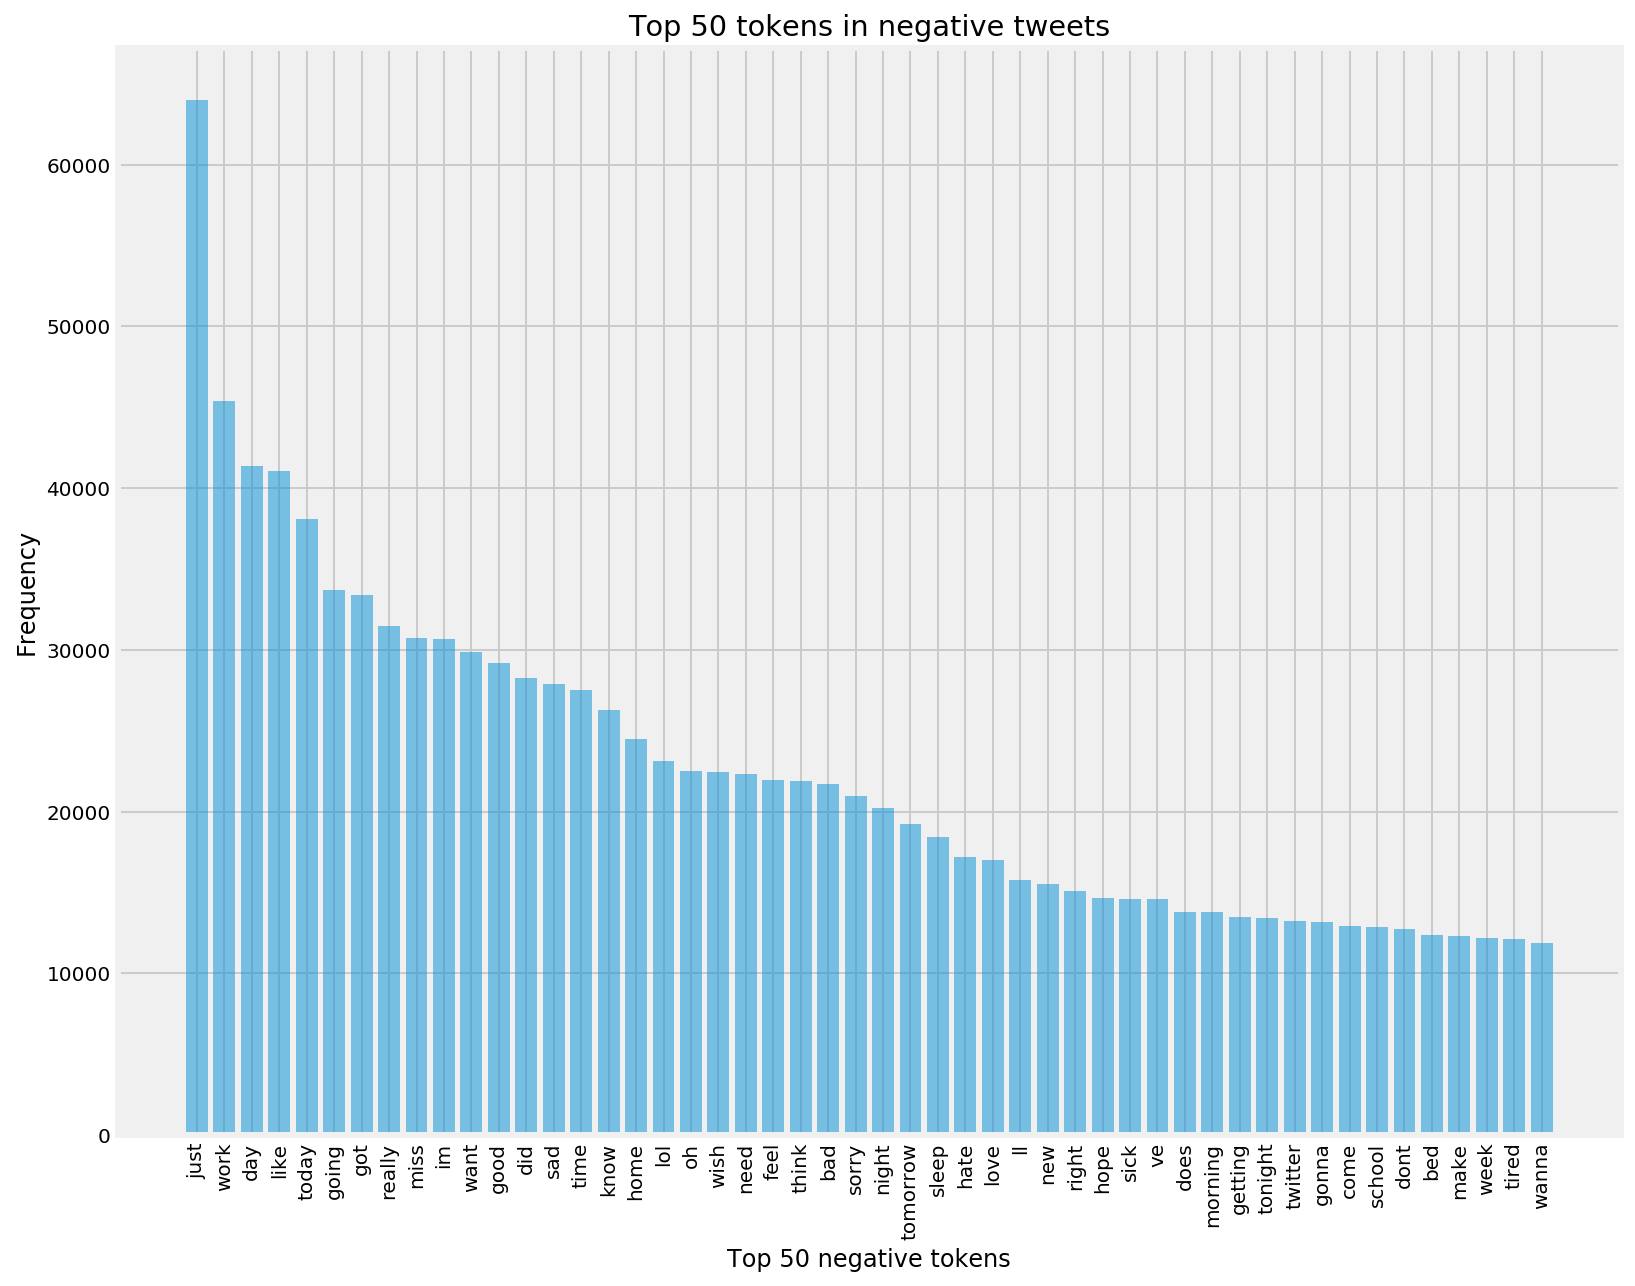

In [13]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df2.sort_values(by='negative', ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df2.sort_values(by='negative', ascending=False)['negative'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative tweets')

Text(0.5, 1.0, 'Top 50 tokens in positive tweets')

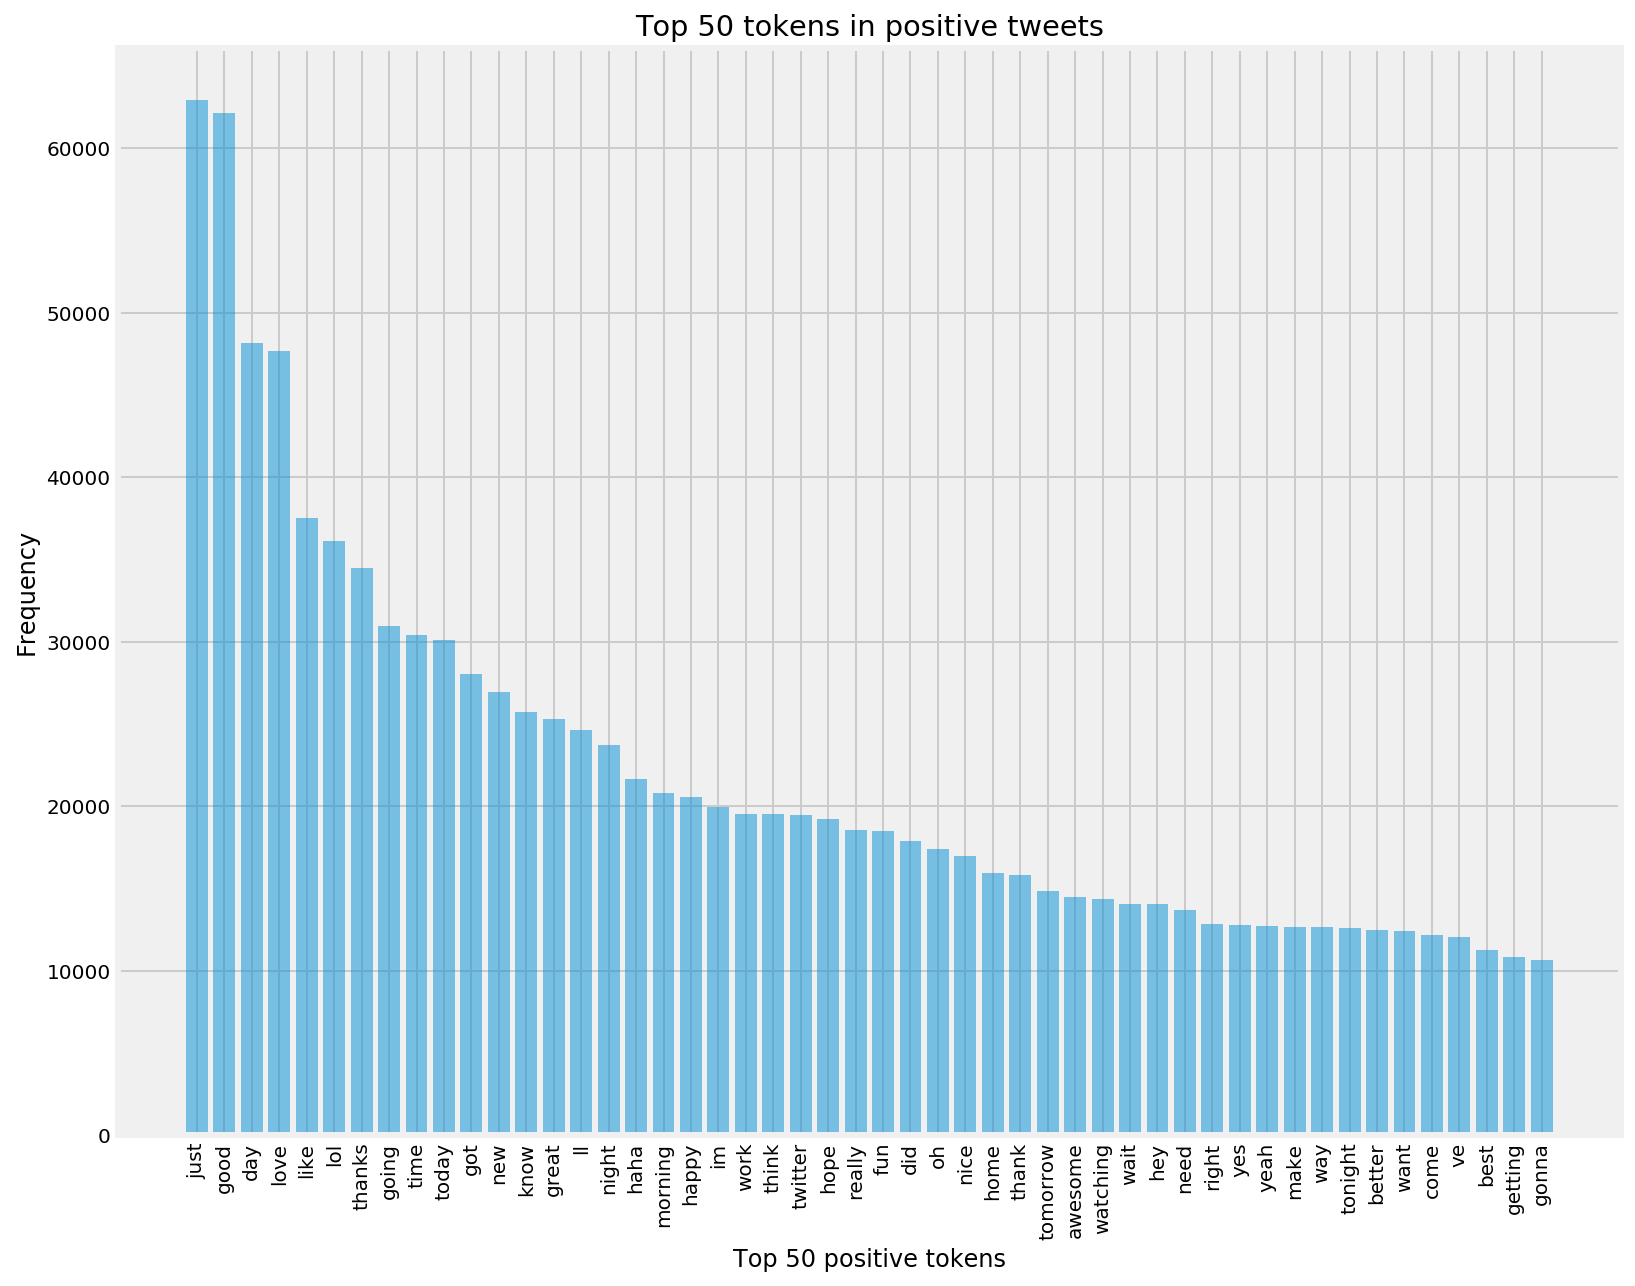

In [14]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df2.sort_values(by='positive', ascending=False)['positive'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df2.sort_values(by='positive', ascending=False)['positive'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 positive tokens')
plt.title('Top 50 tokens in positive tweets')

Text(0.5, 1.0, 'Negative Frequency vs Positive Frequency')

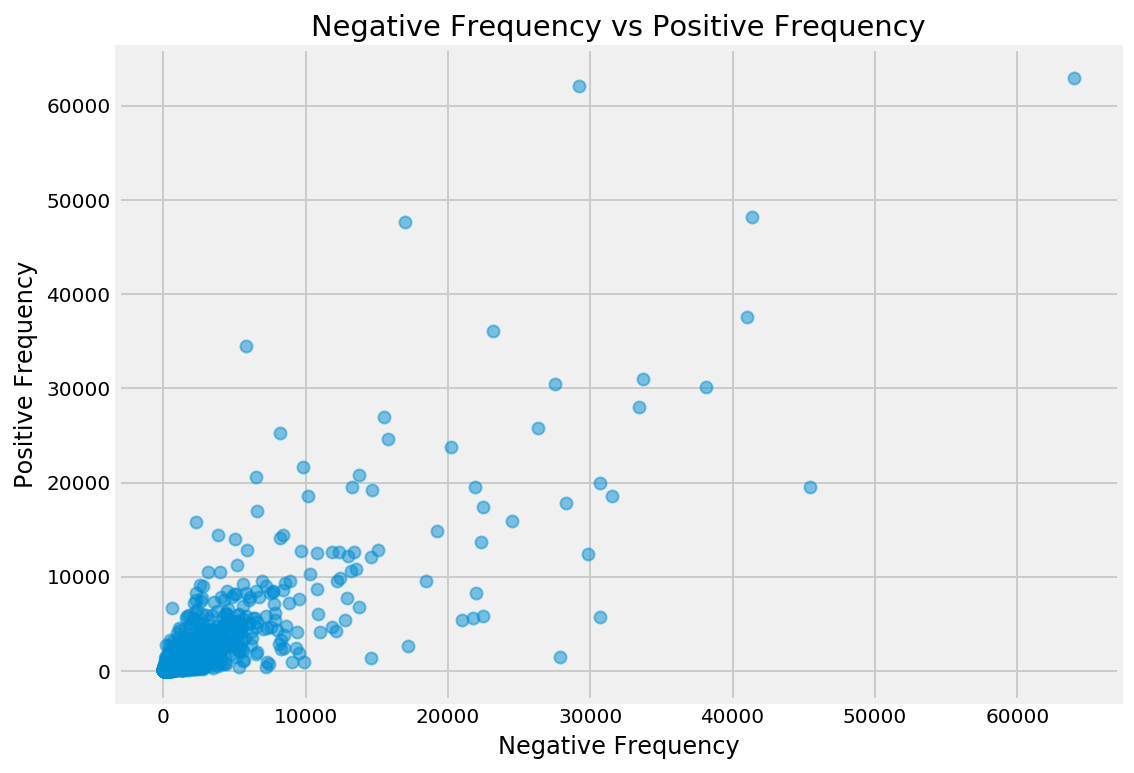

In [15]:
import seaborn as sns
plt.figure(figsize=(8,6))
ax = sns.regplot(x="negative", y="positive",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Frequency')
plt.xlabel('Negative Frequency')
plt.title('Negative Frequency vs Positive Frequency')

In [16]:
term_freq_df2['pos_rate'] = term_freq_df2['positive'] * 1./term_freq_df2['total']
term_freq_df2.sort_values(by='pos_rate', ascending=False).iloc[:10]

,negative,positive,total,pos_rate
mileymonday,0,161,161,1.000000
emailunlimited,0,100,100,1.000000
dividends,0,83,83,1.000000
shareholder,1,80,81,0.987654
fuzzball,2,99,101,0.980198
recommends,3,109,112,0.973214
delongeday,6,162,168,0.964286
atcha,3,80,83,0.963855
timestamp,3,68,71,0.957746
shaundiviney,4,89,93,0.956989


In [17]:
term_freq_df2['pos_freq_pct'] = term_freq_df2['positive'] * 1./term_freq_df2['positive'].sum()
term_freq_df2.sort_values(by='pos_freq_pct', ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct
just,64014,62949,126963,0.495806,0.014393
good,29210,62131,91341,0.680209,0.014206
day,41372,48188,89560,0.538053,0.011018
love,16993,47704,64697,0.737345,0.010908
like,41050,37522,78572,0.477549,0.008579
lol,23139,36132,59271,0.609607,0.008262
thanks,5801,34503,40304,0.856069,0.007889
going,33693,30939,64632,0.478695,0.007074
time,27527,30428,57955,0.525028,0.006957
today,38122,30099,68221,0.441198,0.006882


In [18]:
from scipy.stats import hmean

term_freq_df2['pos_hmean'] = term_freq_df2.apply(lambda x: (hmean([x['pos_rate'], x['pos_freq_pct']])
                                                                   if x['pos_rate'] > 0 and x['pos_freq_pct'] > 0 
                                                                   else 0), axis=1)                                                        
term_freq_df2.sort_values(by='pos_hmean', ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean
just,64014,62949,126963,0.495806,0.014393,0.027974
good,29210,62131,91341,0.680209,0.014206,0.027831
day,41372,48188,89560,0.538053,0.011018,0.021594
love,16993,47704,64697,0.737345,0.010908,0.021497
like,41050,37522,78572,0.477549,0.008579,0.016856
lol,23139,36132,59271,0.609607,0.008262,0.016302
thanks,5801,34503,40304,0.856069,0.007889,0.015634
going,33693,30939,64632,0.478695,0.007074,0.013942
time,27527,30428,57955,0.525028,0.006957,0.013733
today,38122,30099,68221,0.441198,0.006882,0.013553


In [19]:
from scipy.stats import norm
def normcdf(x):
    return norm.cdf(x, x.mean(), x.std())

term_freq_df2['pos_rate_normcdf'] = normcdf(term_freq_df2['pos_rate'])
term_freq_df2['pos_freq_pct_normcdf'] = normcdf(term_freq_df2['pos_freq_pct'])
term_freq_df2['pos_normcdf_hmean'] = hmean([term_freq_df2['pos_rate_normcdf'], term_freq_df2['pos_freq_pct_normcdf']])
term_freq_df2.sort_values(by='pos_normcdf_hmean', ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean,pos_rate_normcdf,pos_freq_pct_normcdf,pos_normcdf_hmean
welcome,620,6703,7323,0.915335,0.001533,0.003060,0.995631,0.999369,0.997496
thank,2291,15817,18108,0.873481,0.003617,0.007203,0.990822,1.000000,0.995390
thanks,5801,34503,40304,0.856069,0.007889,0.015634,0.987732,1.000000,0.993828
awesome,3821,14470,18291,0.791099,0.003309,0.006590,0.967056,1.000000,0.983252
glad,2273,8260,10533,0.784202,0.001889,0.003768,0.963730,0.999972,0.981516
follow,2551,9154,11705,0.782059,0.002093,0.004175,0.962643,0.999996,0.980964
enjoy,1643,5878,7521,0.781545,0.001344,0.002683,0.962378,0.997443,0.979597
sweet,1610,5651,7261,0.778267,0.001292,0.002580,0.960653,0.996351,0.978176
yay,3167,10515,13682,0.768528,0.002404,0.004794,0.955146,1.000000,0.977058
hello,1122,4527,5649,0.801381,0.001035,0.002068,0.971544,0.982334,0.976909


In [20]:
term_freq_df2['neg_rate'] = term_freq_df2['negative'] * 1./term_freq_df2['total']
term_freq_df2['neg_freq_pct'] = term_freq_df2['negative'] * 1./term_freq_df2['negative'].sum()
term_freq_df2['neg_hmean'] = term_freq_df2.apply(lambda x: (hmean([x['neg_rate'], x['neg_freq_pct']])
                                                                   if x['neg_rate'] > 0 and x['neg_freq_pct'] > 0 
                                                                   else 0), axis=1)                                                        
term_freq_df2['neg_rate_normcdf'] = normcdf(term_freq_df2['neg_rate'])
term_freq_df2['neg_freq_pct_normcdf'] = normcdf(term_freq_df2['neg_freq_pct'])
term_freq_df2['neg_normcdf_hmean'] = hmean([term_freq_df2['neg_rate_normcdf'], term_freq_df2['neg_freq_pct_normcdf']])
term_freq_df2.sort_values(by='neg_normcdf_hmean', ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean,pos_rate_normcdf,pos_freq_pct_normcdf,pos_normcdf_hmean,neg_rate,neg_freq_pct,neg_hmean,neg_rate_normcdf,neg_freq_pct_normcdf,neg_normcdf_hmean
sad,27913,1514,29427,0.051449,0.000346,0.000688,0.002384,0.710225,0.004753,0.948551,0.006094,0.012111,0.997616,1.000000,0.998806
hurts,7204,456,7660,0.059530,0.000104,0.000208,0.002791,0.503829,0.005552,0.940470,0.001573,0.003141,0.997209,0.999741,0.998473
sick,14616,1420,16036,0.088551,0.000325,0.000647,0.004820,0.693455,0.009574,0.911449,0.003191,0.006360,0.995180,1.000000,0.997584
sucks,9905,982,10887,0.090199,0.000225,0.000448,0.004968,0.610367,0.009855,0.909801,0.002163,0.004315,0.995032,0.999999,0.997510
poor,7435,739,8174,0.090409,0.000169,0.000337,0.004987,0.561679,0.009886,0.909591,0.001623,0.003241,0.995013,0.999835,0.997418
ugh,9054,999,10053,0.099373,0.000228,0.000456,0.005864,0.613718,0.011616,0.900627,0.001977,0.003945,0.994136,0.999995,0.997057
missing,7282,991,8273,0.119787,0.000227,0.000452,0.008388,0.612142,0.016549,0.880213,0.001590,0.003174,0.991612,0.999777,0.995678
headache,5317,421,5738,0.073371,0.000096,0.000192,0.003636,0.496643,0.007219,0.926629,0.001161,0.002319,0.996364,0.993799,0.995080
hate,17209,2614,19823,0.131867,0.000598,0.001190,0.010294,0.868664,0.020347,0.868133,0.003757,0.007482,0.989706,1.000000,0.994826
miss,30715,5679,36394,0.156042,0.001299,0.002576,0.015267,0.996505,0.030073,0.843958,0.006706,0.013307,0.984733,1.000000,0.992308


Text(0.5, 1.0, 'neg_hmean vs pos_hmean')

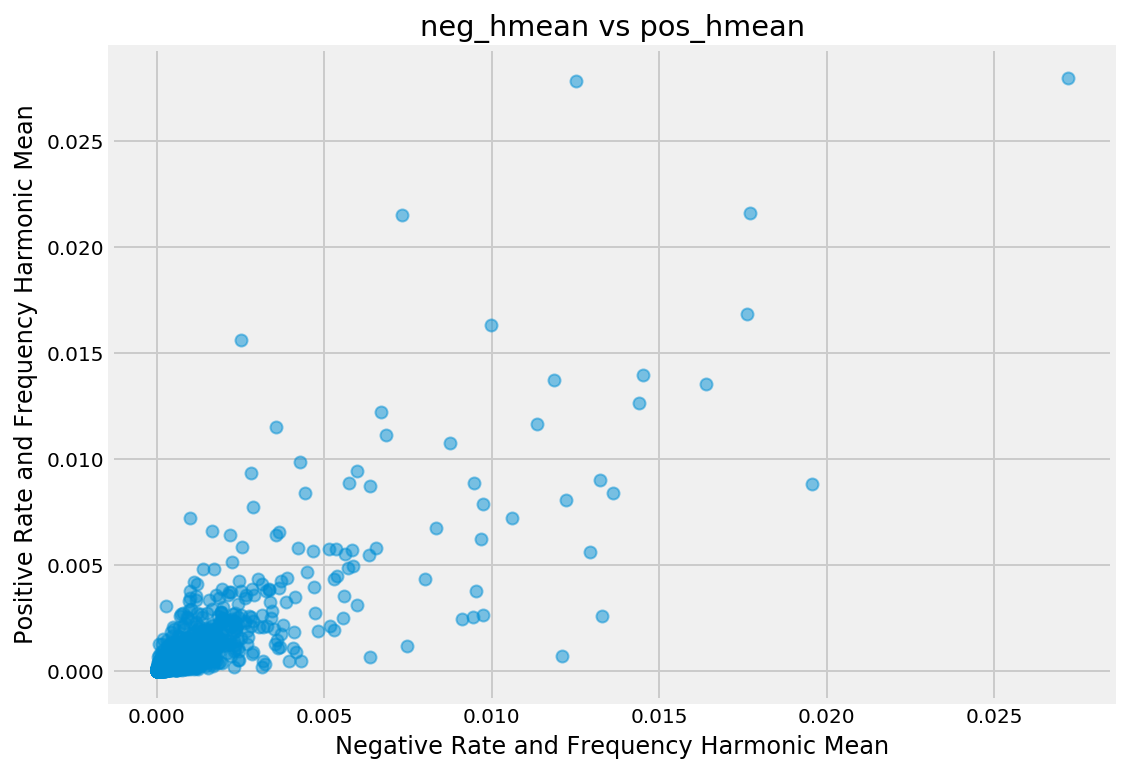

In [21]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="neg_hmean", y="pos_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Rate and Frequency Harmonic Mean')
plt.xlabel('Negative Rate and Frequency Harmonic Mean')
plt.title('neg_hmean vs pos_hmean')

Text(0.5, 1.0, 'neg_normcdf_hmean vs pos_normcdf_hmean')

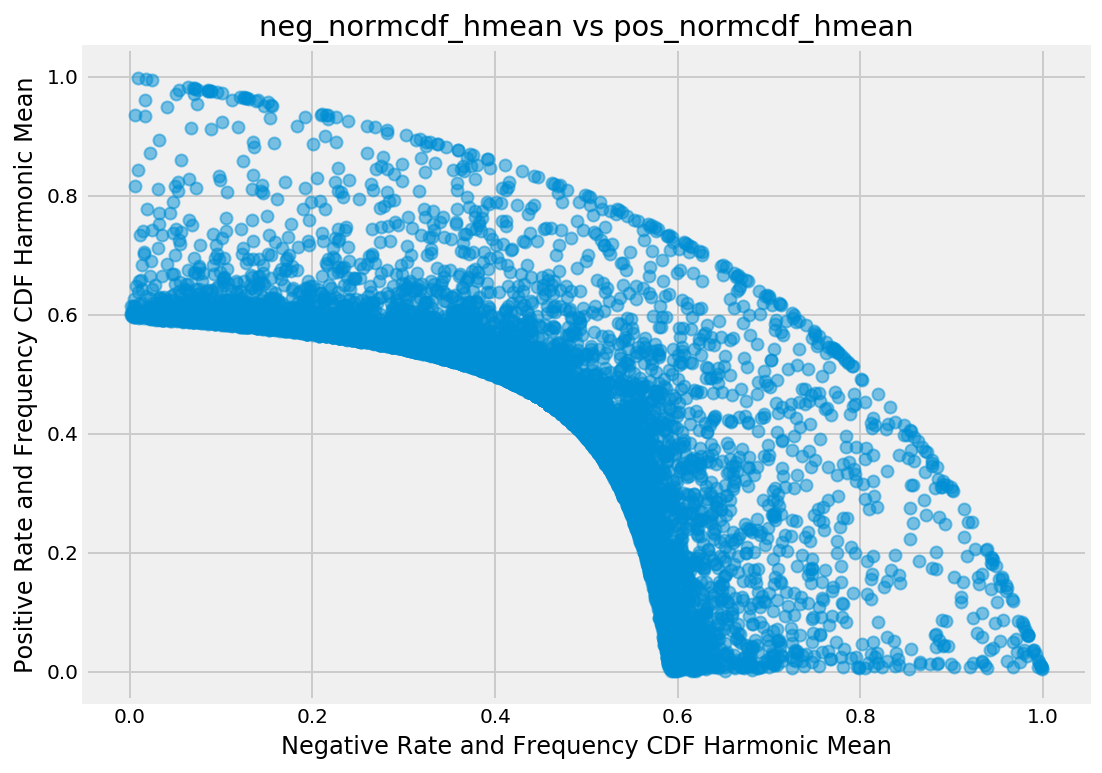

In [22]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="neg_normcdf_hmean", y="pos_normcdf_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Rate and Frequency CDF Harmonic Mean')
plt.xlabel('Negative Rate and Frequency CDF Harmonic Mean')
plt.title('neg_normcdf_hmean vs pos_normcdf_hmean')